# Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\aravi\Downloads\Skin_cancer_detection.csv")

### Analyzing of first 10 data

In [2]:
df.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back


### Analyzing of last 10 data

In [3]:
df.tail(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization
10005,HAM_0005579,ISIC_0028393,akiec,histo,80.0,male,face
10006,HAM_0004034,ISIC_0024948,akiec,histo,55.0,female,face
10007,HAM_0001565,ISIC_0028619,akiec,histo,60.0,female,face
10008,HAM_0001576,ISIC_0033705,akiec,histo,60.0,male,face
10009,HAM_0005705,ISIC_0031430,akiec,histo,75.0,female,lower extremity
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face
10014,HAM_0003521,ISIC_0032258,mel,histo,70.0,female,back


### Checking information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [5]:
df.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

### Checking for null value

In [6]:

df['age'].fillna(df['age'].mean(), inplace=True)

C:\Users\aravi\AppData\Local\Temp\ipykernel_80176\2894221085.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [7]:
df.isna().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [8]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
data_filtered = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

In [9]:
from scipy.stats import zscore

# Calculate z-scores for the 'age' column
df['z_score'] = zscore(df['age'])

# Filter data to remove rows with z-score above 3 or below -3
data_filtered = df[abs(df['z_score']) < 3]

# Drop the z_score column if no longer needed
data_filtered = data_filtered.drop(columns=['z_score'])


# Statistical Analysis

## Covariance

In [10]:
print(df.cov(numeric_only=True))

                age    z_score
age      286.294922  16.921097
z_score   16.921097   1.000100


## Correlation

In [11]:
correlation=df.corr(numeric_only=True)
print(correlation)

         age  z_score
age      1.0      1.0
z_score  1.0      1.0


## BOXPLOT

C:\Users\aravi\AppData\Local\Temp\ipykernel_80176\2843660756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='age', data=df, palette='coolwarm')


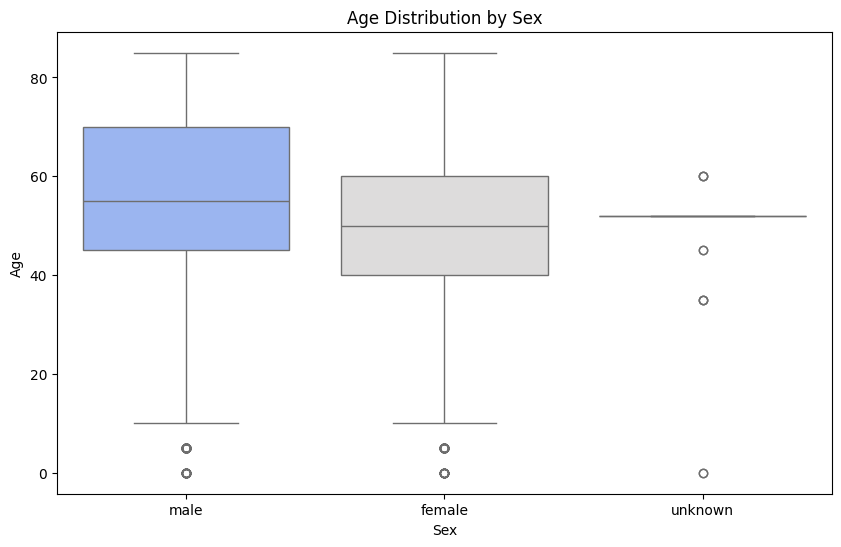

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', data=df, palette='coolwarm')
plt.title('Age Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()


### SCATTERPLOT

C:\Users\aravi\AppData\Local\Temp\ipykernel_80176\328281842.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')


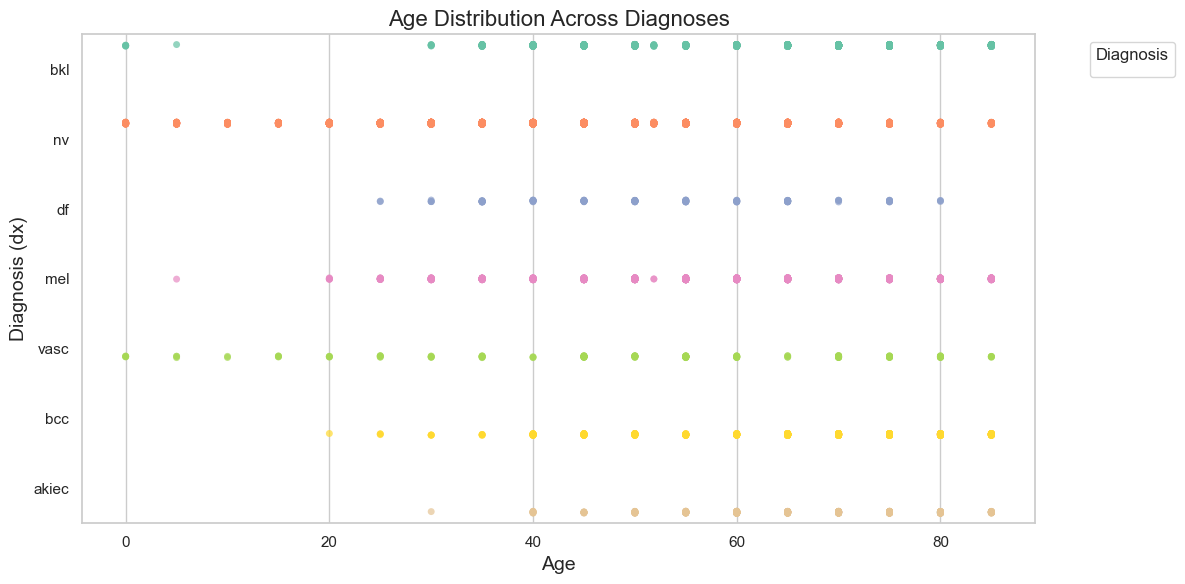

In [13]:
data_cleaned = df.dropna(subset=['age'])

# Set plot size and style
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create scatterplot with jitter for clarity
sns.stripplot(
    data=data_cleaned,
    x='age',
    y='dx',
    hue='dx',
    jitter=True,
    palette='Set2',
    dodge=True,
    alpha=0.7
)

# Customize labels and title
plt.title('Age Distribution Across Diagnoses', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Diagnosis (dx)', fontsize=14)
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd


data = df.dropna()

# Encode categorical columns using LabelEncoder
label_encoders = {}
for column in ['dx', 'dx_type', 'sex', 'localization']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features (X) and target (y)
# Ensure X includes only numerical columns
X = df[['age', 'sex', 'localization']]  # All are numerical after encoding
y = df['dx']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Initialize and train Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_boost = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_boost)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_boost))

Accuracy: 0.71

Classification Report:

              precision    recall  f1-score   support

           0       0.25      0.09      0.13        69
           1       0.30      0.09      0.13        93
           2       0.44      0.33      0.38       228
           3       0.00      0.00      0.00        28
           4       0.34      0.10      0.16       226
           5       0.76      0.97      0.85      1338
           6       1.00      0.05      0.09        21

    accuracy                           0.71      2003
   macro avg       0.44      0.23      0.25      2003
weighted avg       0.63      0.71      0.64      2003



c:\Users\aravi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aravi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aravi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Accuracy: 0.70

Classification Report:

              precision    recall  f1-score   support

           0       0.33      0.09      0.14        69
           1       0.40      0.02      0.04        93
           2       0.42      0.36      0.38       228
           3       0.00      0.00      0.00        28
           4       0.37      0.12      0.18       226
           5       0.75      0.97      0.85      1338
           6       0.00      0.00      0.00        21

    accuracy                           0.70      2003
   macro avg       0.33      0.22      0.23      2003
weighted avg       0.62      0.70      0.64      2003



c:\Users\aravi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aravi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aravi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# SUMMARY

### Dataset Overview  
### The dataset is designed for skin cancer detection and contains detailed information about skin lesions and related patient demographics. It includes key features like `lesion_id`, a unique identifier for each lesion, and `image_id`, a unique identifier for images associated with the lesion. The primary target variable, `dx`, represents the diagnosis of the lesion, which includes categories such as benign keratosis and melanoma. The type of diagnosis (`dx_type`) specifies whether it was determined histologically, clinically, or through another method.

### Patient Demographics  
### The dataset captures critical patient demographics such as `age` and `sex`. The `age` column indicates the patient's age at the time of diagnosis, which can be vital in identifying age-related trends in lesion types. The `sex` column includes binary values (e.g., male and female), allowing for gender-based analysis of skin cancer prevalence.

### Localization and Features  
### The `localization` column specifies the body part where the lesion is located, such as the scalp, back, or ear. This information is particularly useful in determining patterns of lesion occurrence in different body regions, contributing to better diagnostic accuracy. Numerical features like `age` and encoded categorical features like `sex` and `localization` form the basis for building predictive models.

### Application and Significance  
### This dataset provides a comprehensive foundation for machine learning tasks, particularly for supervised classification models aiming to predict lesion types (`dx`). By preprocessing categorical data and handling missing values, the dataset can be used to train and evaluate models like Random Forests or Gradient Boosting Classifiers. It holds immense potential in advancing dermatological diagnostics by aiding in the early and accurate detection of skin cancer.